In [166]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold

# Machine learning
import catboost
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#from jupyterthemes.stylefx import set_nb_theme
#set_nb_theme('monokai')

In [127]:
train=pd.read_csv('D:\\Data Science\\HR-Analytics\\train.csv')
test=pd.read_csv('D:\\Data Science\\HR-Analytics\\test.csv')
smple_submission=pd.read_csv('D:\\Data Science\\HR-Analytics\\sample_submission.csv')

In [128]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [129]:
train.shape

(54808, 14)

In [130]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


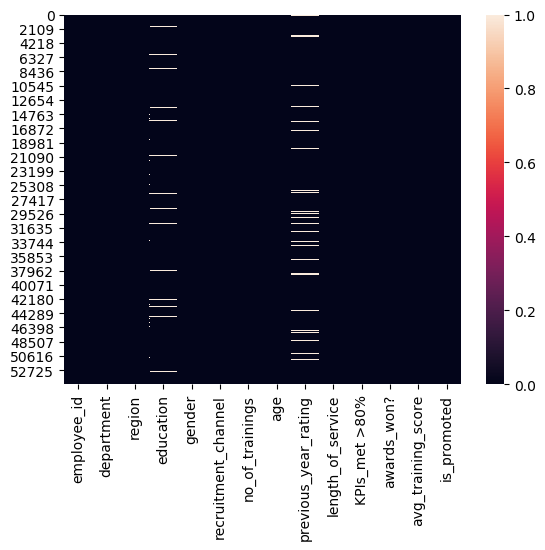

In [132]:
plt.style.use('default')
sns.heatmap(train.isna())
plt.show()

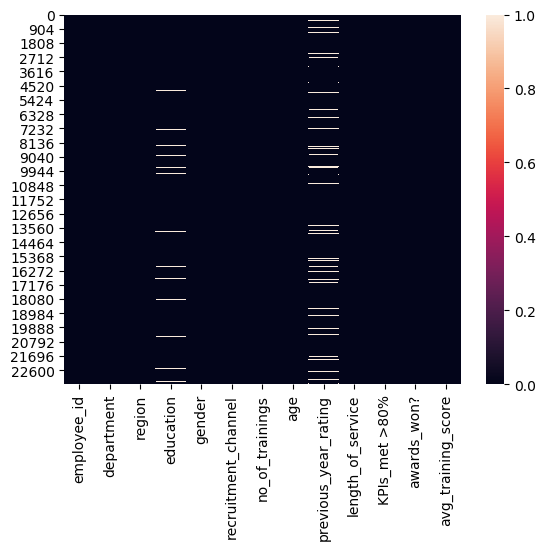

In [133]:
plt.style.use('default')
sns.heatmap(test.isna())
plt.show()

# Feature : Department

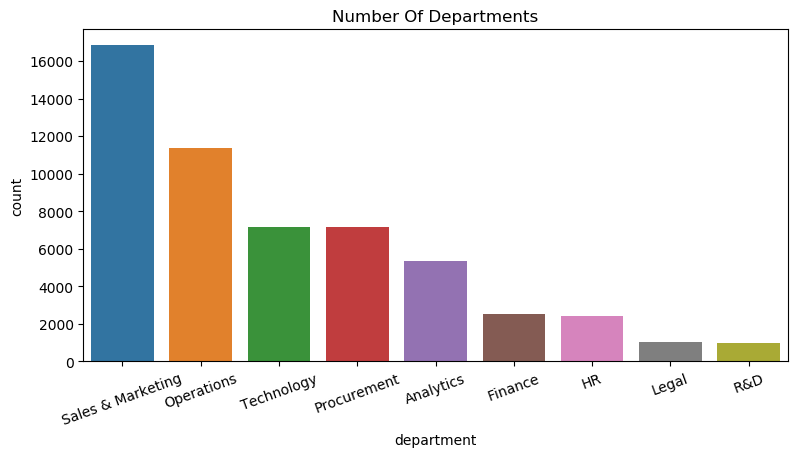

In [134]:
plt.style.use('default')
plt.figure(figsize=(20,25))

plt.subplot(5,2,1)
sns.countplot(x=train.department,order=train.department.value_counts().index)
plt.xticks(rotation = 20)
plt.title('Number Of Departments')

plt.show()

# Feature : Region

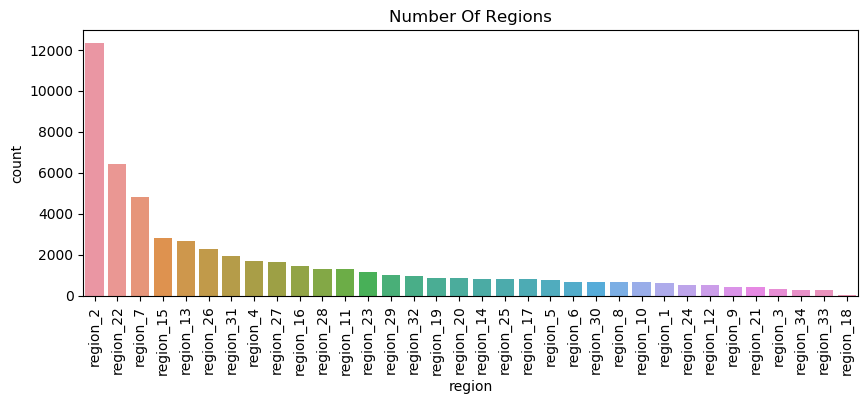

In [135]:
plt.style.use('default')
plt.figure(figsize=(10,20))

plt.subplot(5,1,1)
sns.countplot(x=train.region,order=train.region.value_counts().index)
plt.xticks(rotation = 90)
plt.title('Number Of Regions')

plt.show()

# Feature : Education

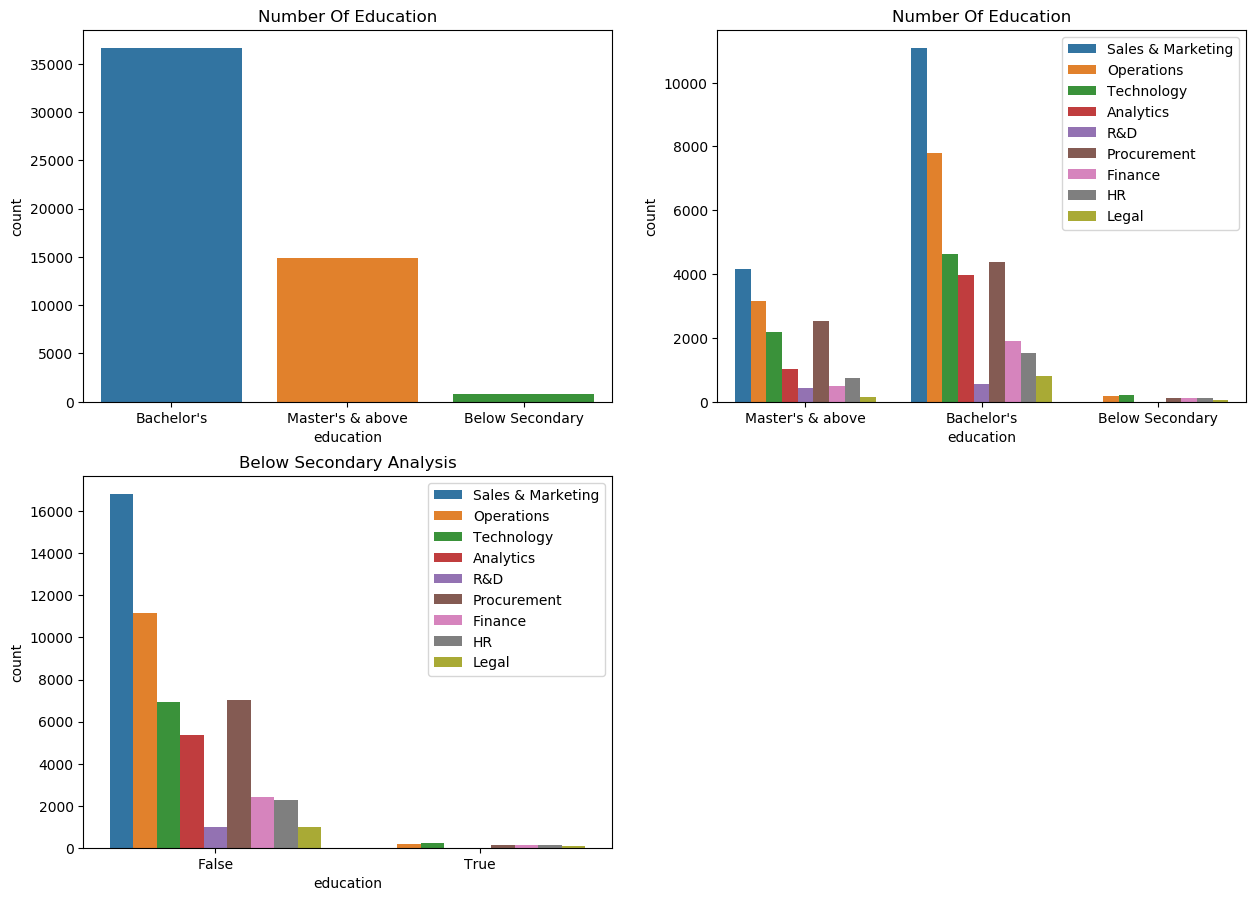

In [136]:
plt.style.use('default')
plt.figure(figsize=(15,28))

plt.subplot(5,2,1)
sns.countplot(x=train.education,order=train.education.value_counts().index)
plt.xticks(rotation = 0)
plt.title('Number Of Education')

plt.subplot(5,2,2)
sns.countplot(x=train.education,hue=train.department)
plt.legend(loc='upper right')
plt.title('Number Of Education')

plt.subplot(5,2,3)
sns.countplot(train['education'].apply(lambda x : x=="Below Secondary") , hue=train.department )
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.title('Below Secondary Analysis')

plt.show()

# Feature : Gender

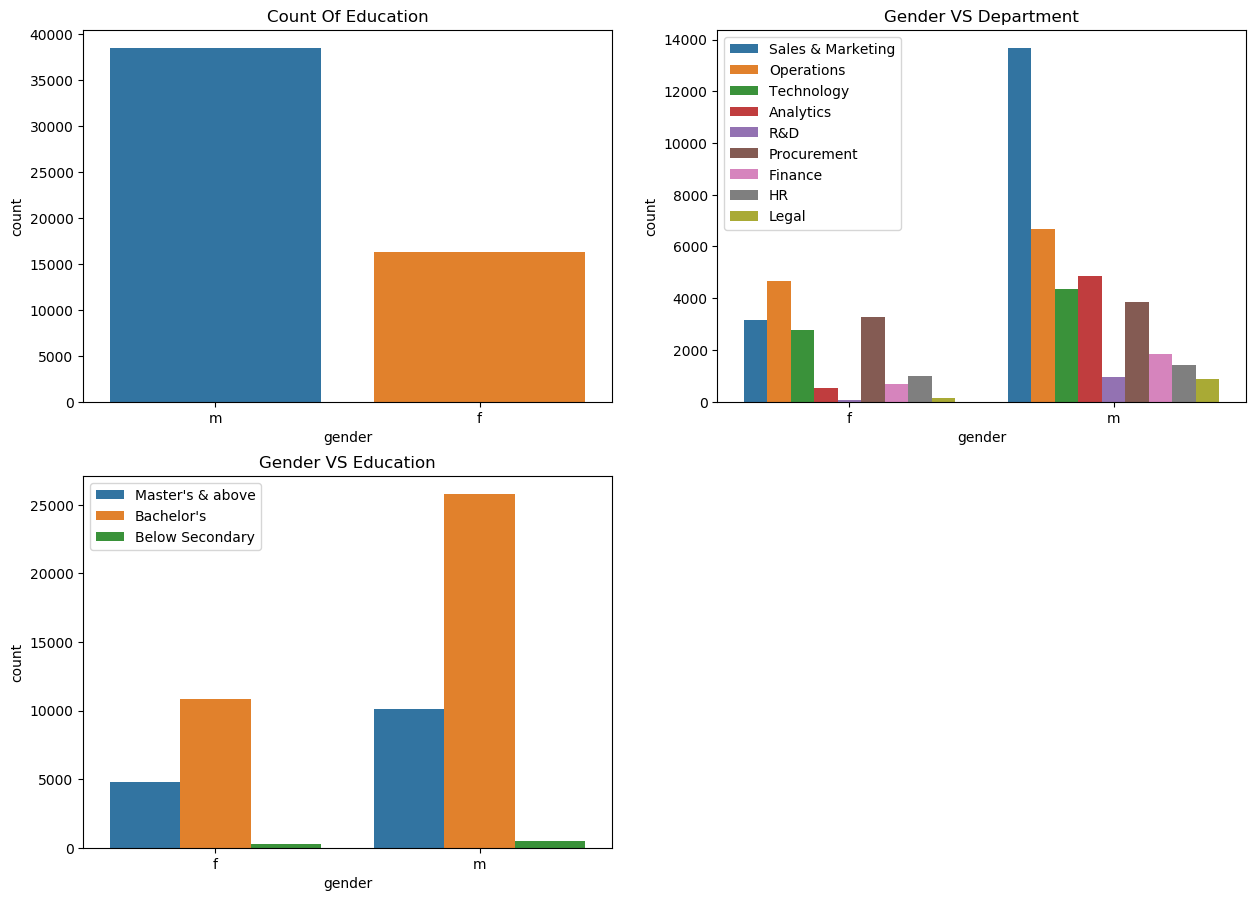

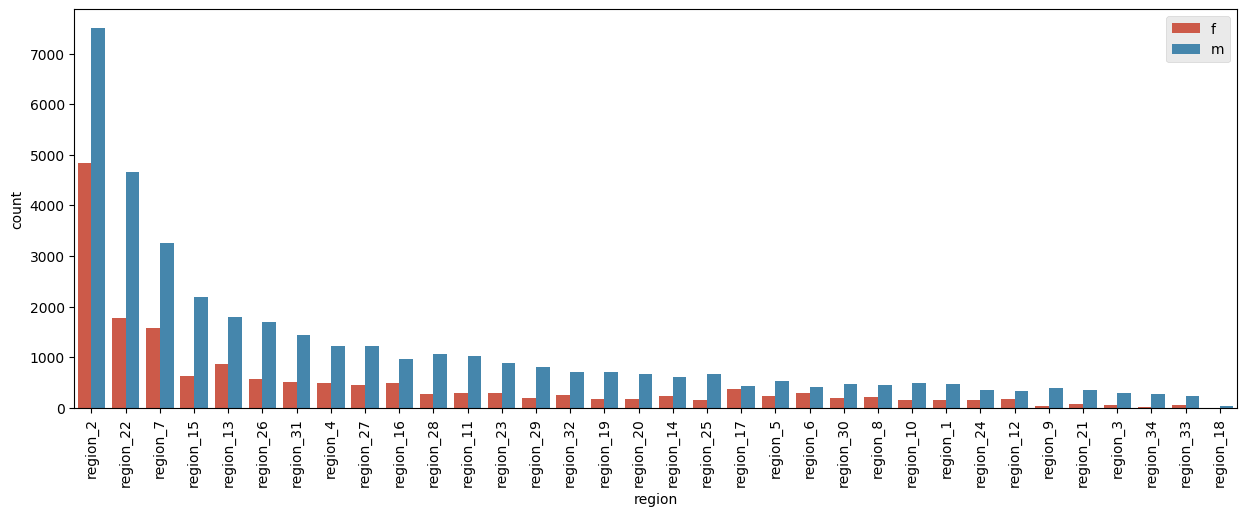

In [137]:
plt.style.use('default')
plt.figure(figsize=(15,28))

plt.subplot(5,2,1)
sns.countplot(x=train.gender,order=train.gender.value_counts().index)
plt.xticks(rotation = 0)
plt.title('Count Of Education')

plt.subplot(5,2,2)
sns.countplot(x=train.gender,hue=train.department)
plt.legend(loc='upper left')
plt.title('Gender VS Department')

plt.subplot(5,2,3)
sns.countplot(train['gender'] , hue=train.education )
plt.xticks(rotation = 0)
plt.legend(loc='upper left')
plt.title('Gender VS Education')

plt.figure(figsize=(15,30))
plt.subplot(5,2,(5,6))
plt.style.use('ggplot')
sns.countplot(train['region'] , hue=train['gender'],order=train.region.value_counts().index  )
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.show()

# Feature : Recruitment Channel

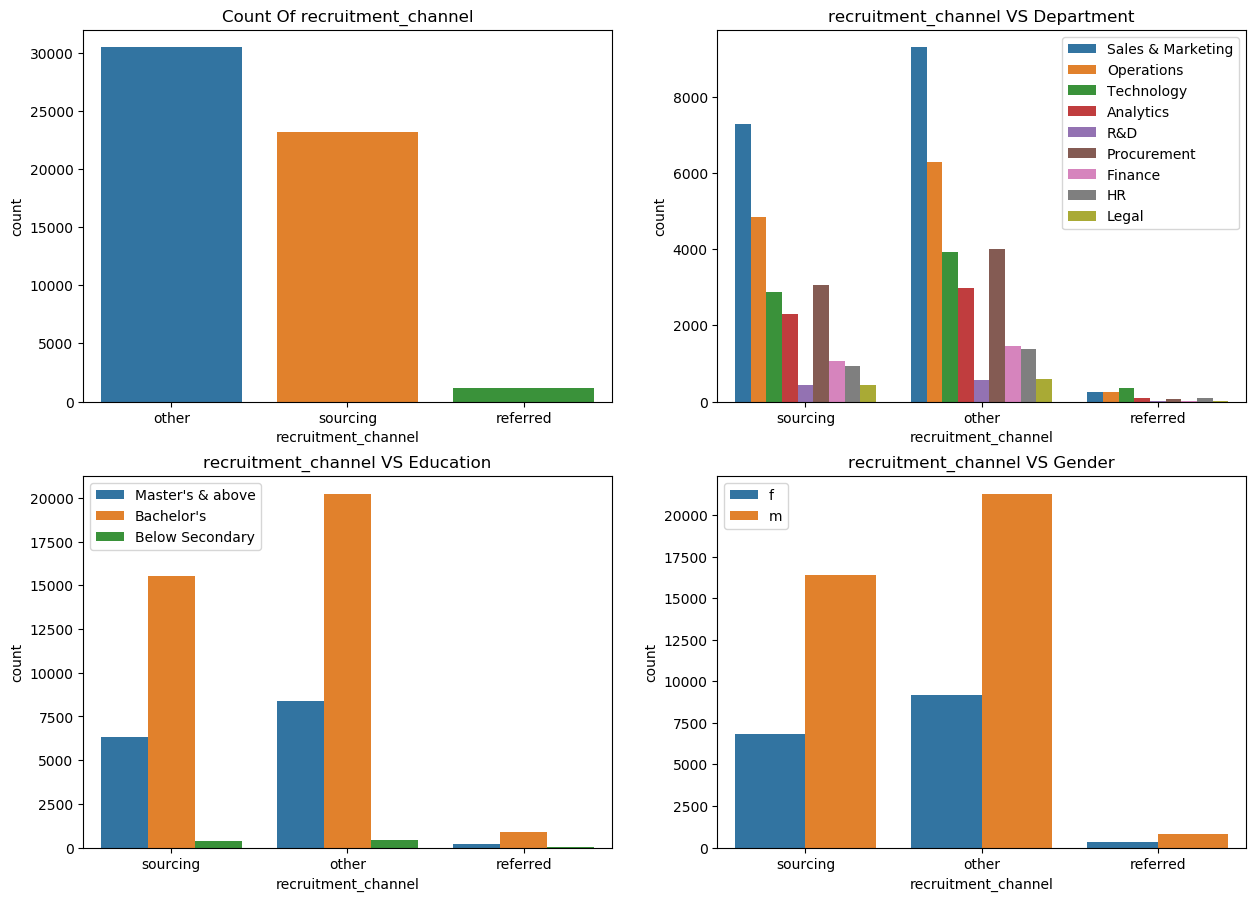

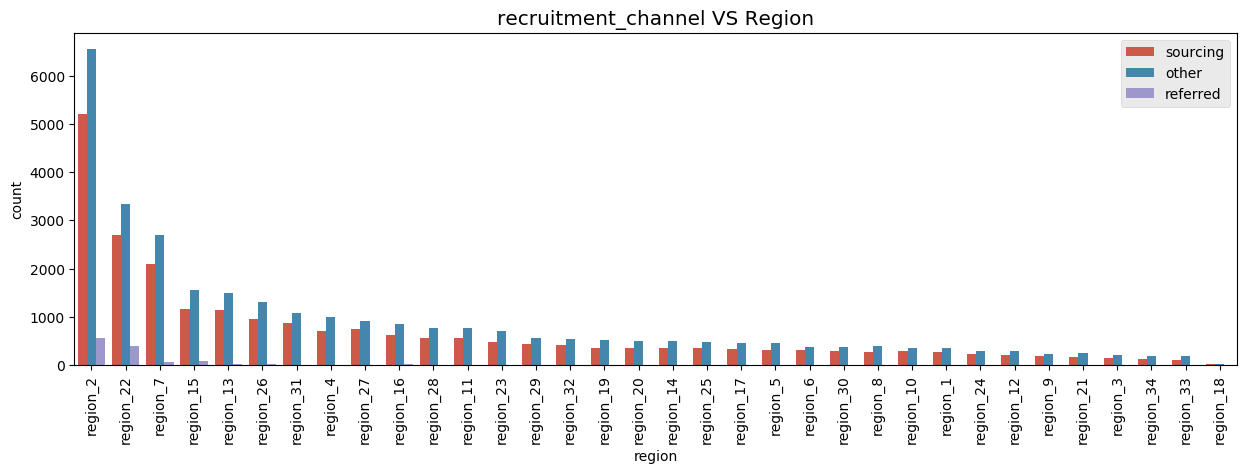

In [138]:
plt.style.use('default')
plt.figure(figsize=(15,28))

plt.subplot(5,2,1)
sns.countplot(x=train.recruitment_channel,order=train.recruitment_channel.value_counts().index)
plt.xticks(rotation = 0)
plt.title('Count Of recruitment_channel')

plt.subplot(5,2,2)
sns.countplot(x=train.recruitment_channel,hue=train.department)
plt.legend(loc='upper right')
plt.title('recruitment_channel VS Department')

plt.subplot(5,2,3)
sns.countplot(train['recruitment_channel'] , hue=train.education )
plt.xticks(rotation = 0)
plt.legend(loc='upper left')
plt.title('recruitment_channel VS Education')

plt.subplot(5,2,4)
sns.countplot(train['recruitment_channel'] , hue=train.gender )
plt.xticks(rotation = 0)
plt.legend(loc='upper left')
plt.title('recruitment_channel VS Gender')

plt.figure(figsize=(15,25))
plt.subplot(5,2,(5,6))
plt.style.use('ggplot')
sns.countplot(train['region'] , hue=train['recruitment_channel'],order=train.region.value_counts().index )
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.title('recruitment_channel VS Region')

plt.show()

# Feature : No_Of_Trainings

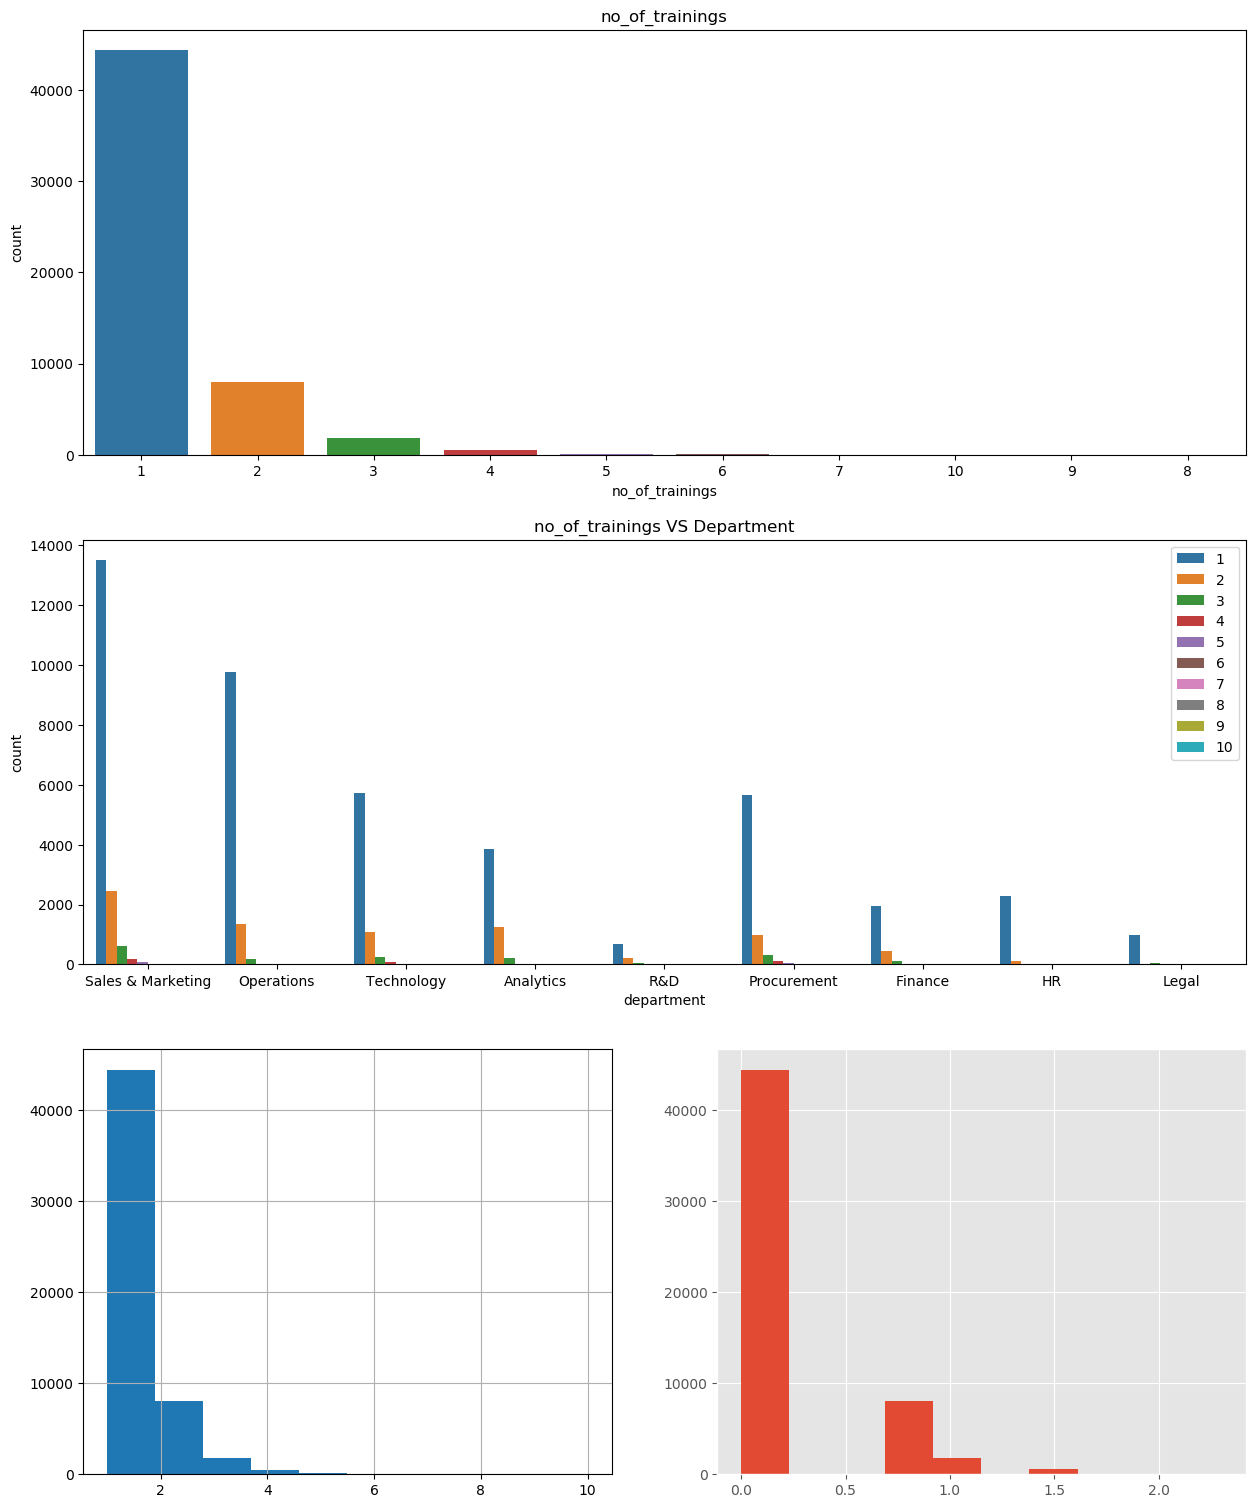

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


In [139]:
plt.style.use('default')
plt.figure(figsize=(15,32))

plt.subplot(5,2,(1,2))
sns.countplot(x=train.no_of_trainings,order=train.no_of_trainings.value_counts().index)
plt.xticks(rotation = 0)
plt.title('no_of_trainings')

plt.subplot(5,2,(3,4))
sns.countplot(x=train.department,hue=train.no_of_trainings)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.title('no_of_trainings VS Department')

plt.subplot(5,2,5)
plt.style.use('ggplot')
train.no_of_trainings.hist()

plt.subplot(5,2,6)
plt.style.use('ggplot')
np.log(train.no_of_trainings).hist()

plt.show()

print(train.no_of_trainings.value_counts())

# Feature : Age

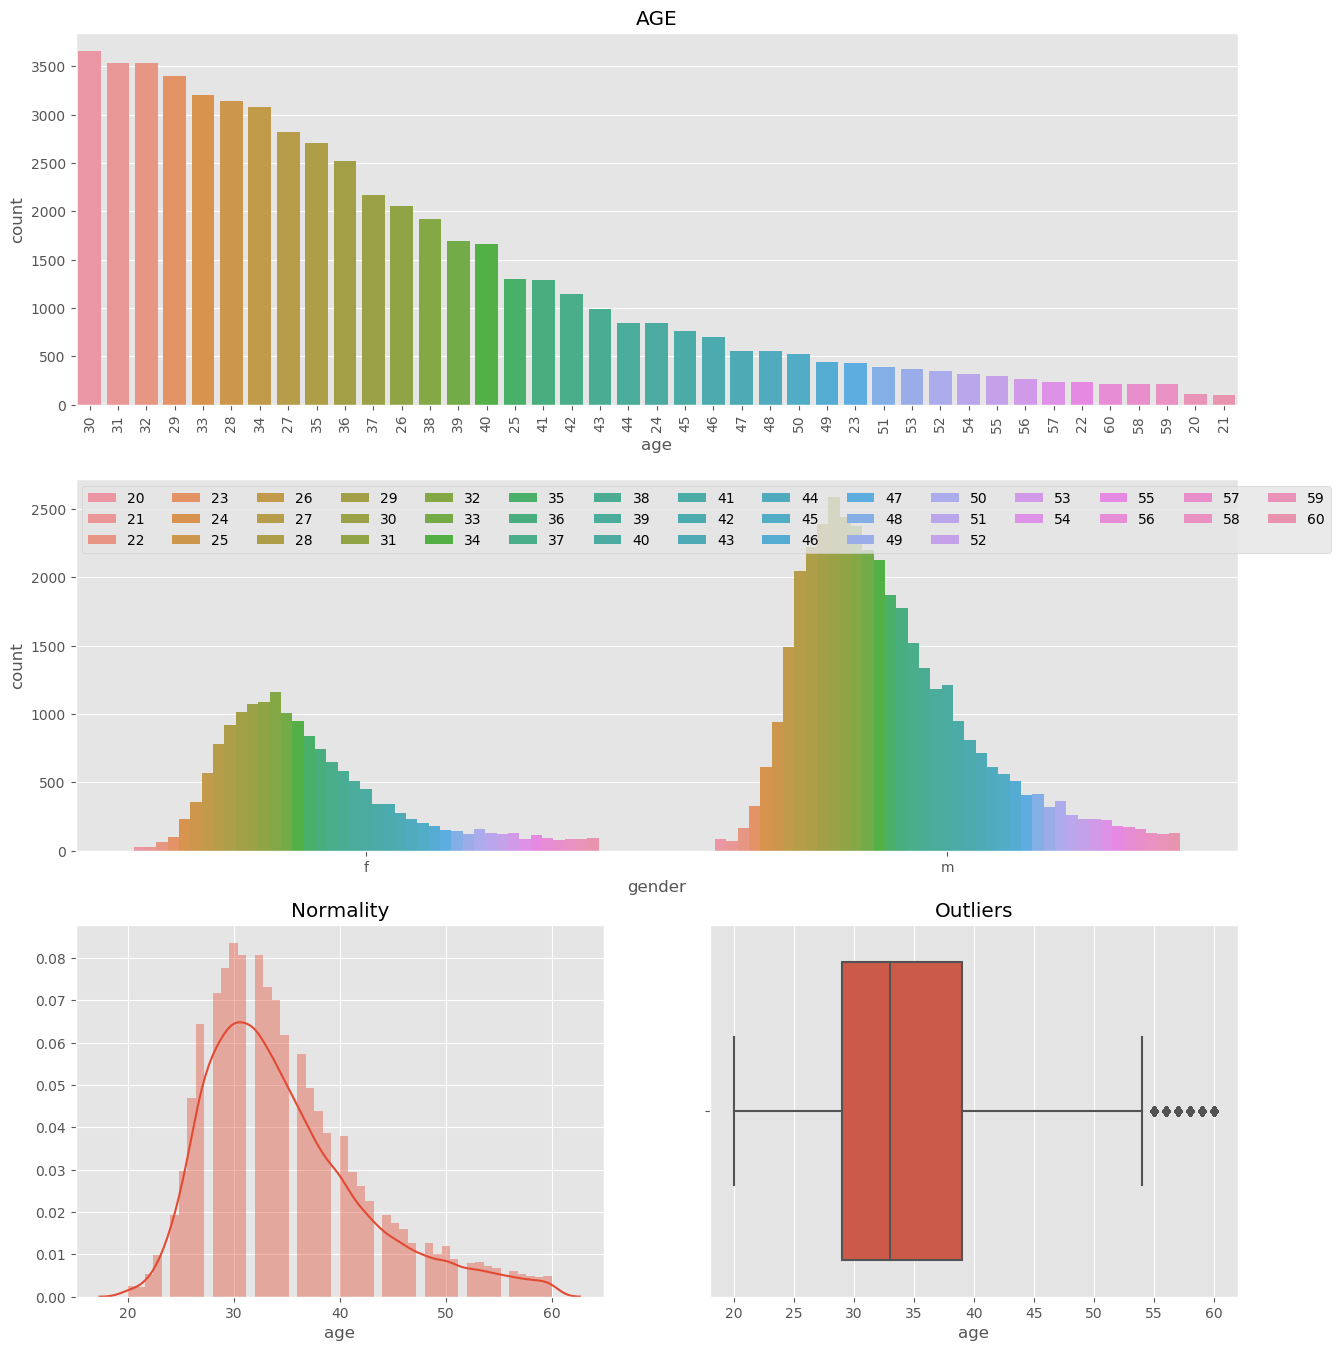

In [140]:
plt.style.use('ggplot')
plt.figure(figsize=(15,28))

plt.subplot(5,2,(1,2))
sns.countplot(x=train.age,order=train.age.value_counts().index)
plt.xticks(rotation = 90)
plt.title('AGE')

plt.subplot(5,2,(3,4))
sns.countplot(x=train.gender,hue=train.age)
plt.legend(loc='upper left',ncol = 15)

plt.subplot(5,2,5)
sns.distplot(train.age)
plt.title('Normality')

plt.subplot(5,2,6)
sns.boxplot(train.age)
plt.title('Outliers')

plt.show()

# Feature : Previous Year Rating

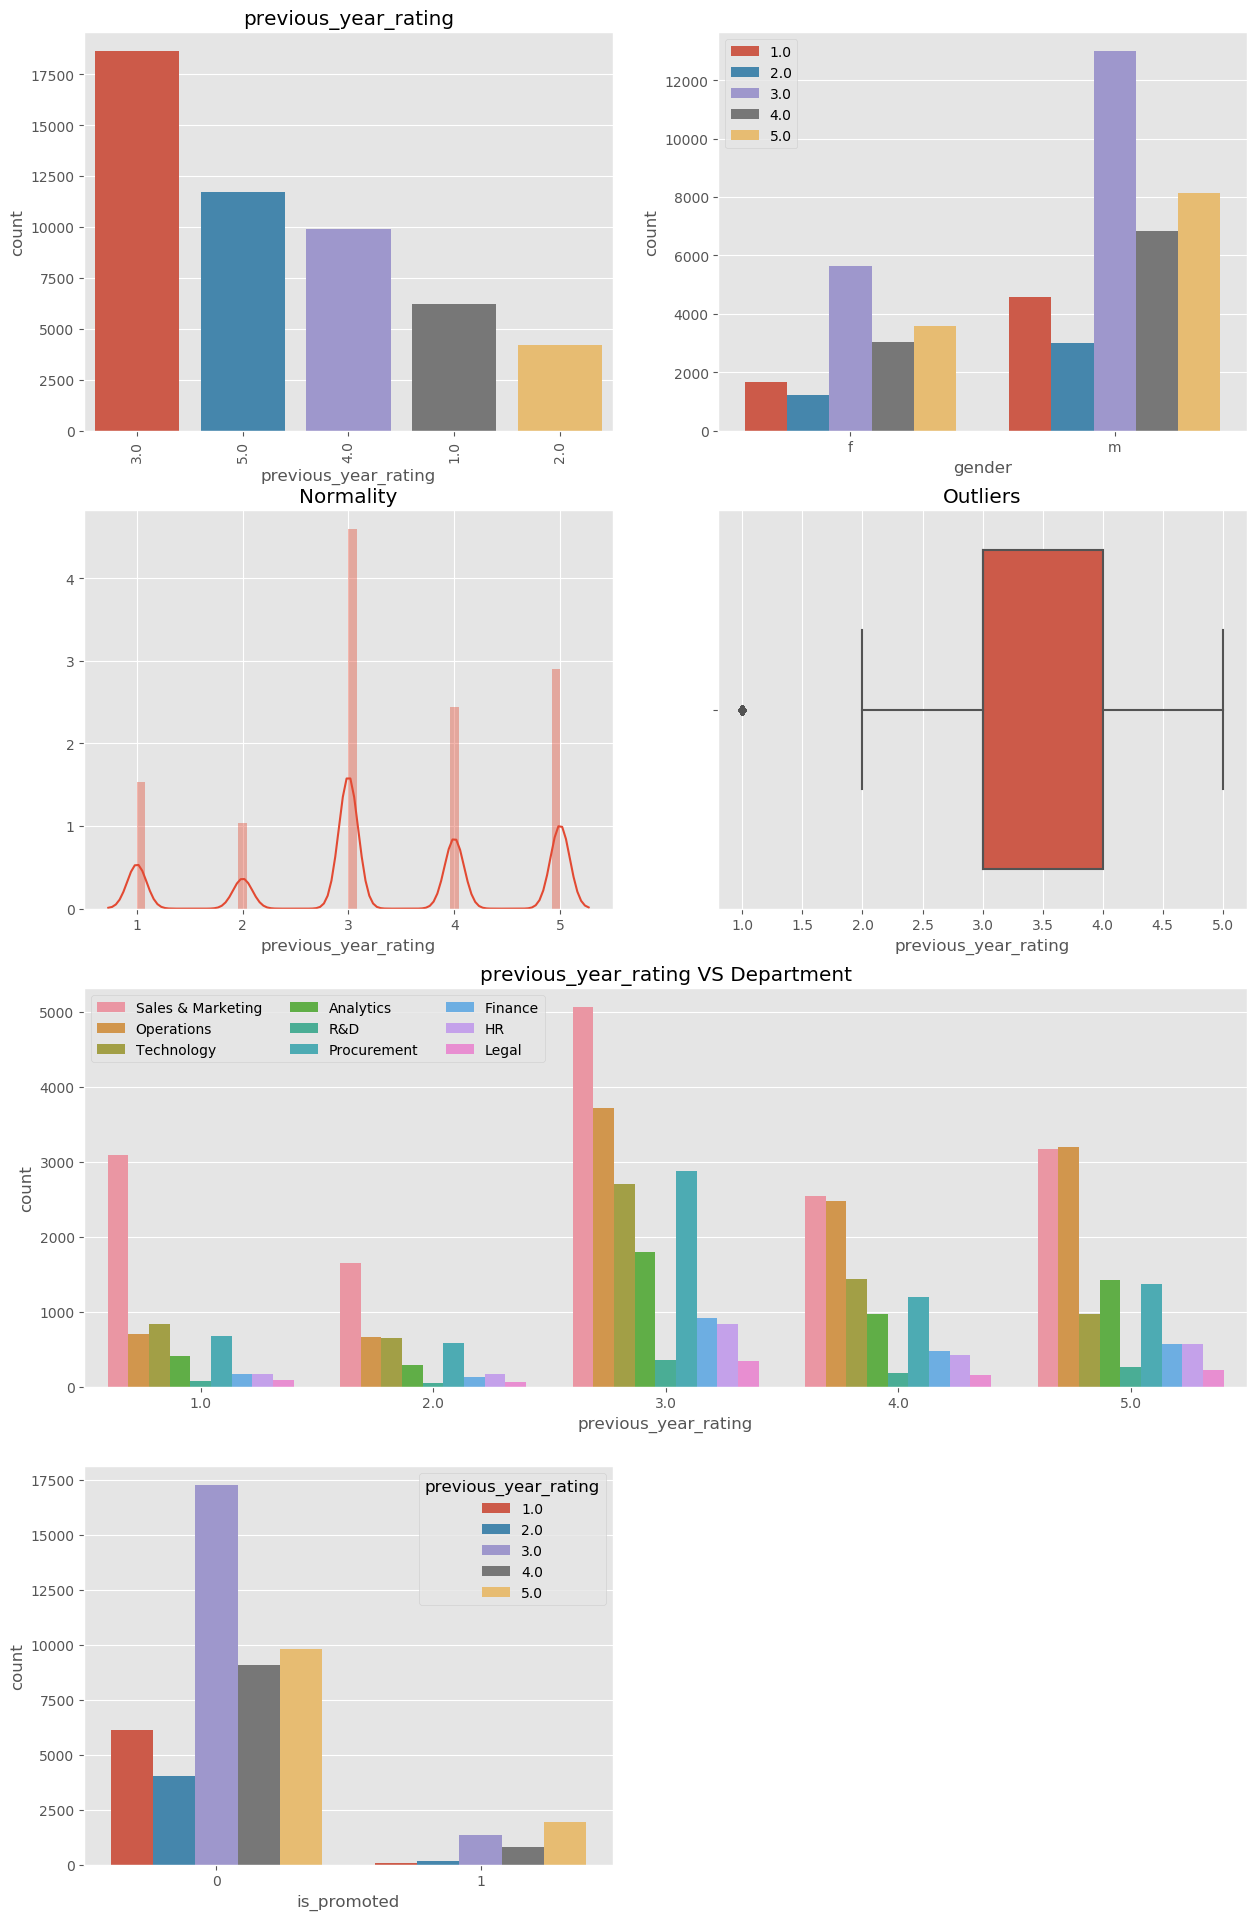

is_promoted
0    46355
1     4329
Name: previous_year_rating, dtype: int64

In [141]:
plt.style.use('ggplot')
plt.figure(figsize=(15,30))

plt.subplot(5,2,1)
sns.countplot(x=train.previous_year_rating,order=train.previous_year_rating.value_counts().index)
plt.xticks(rotation = 90)
plt.title('previous_year_rating')

plt.subplot(5,2,2)
sns.countplot(x=train.gender,hue=train.previous_year_rating)
plt.legend(loc='upper left')

plt.subplot(5,2,3)
sns.distplot(train.previous_year_rating)
plt.title('Normality')

plt.subplot(5,2,4)
sns.boxplot(train.previous_year_rating)
plt.title('Outliers')

plt.subplot(5,2,(5,6))
sns.countplot(train.previous_year_rating,hue=train.department)
plt.legend(loc='upper left',ncol=3)
plt.title('previous_year_rating VS Department')

plt.subplot(5,2,7)
sns.countplot(x=train.is_promoted,hue=train.previous_year_rating)


plt.show()


train.groupby('is_promoted')['previous_year_rating'].count().head()

# Feature : Length Of Service

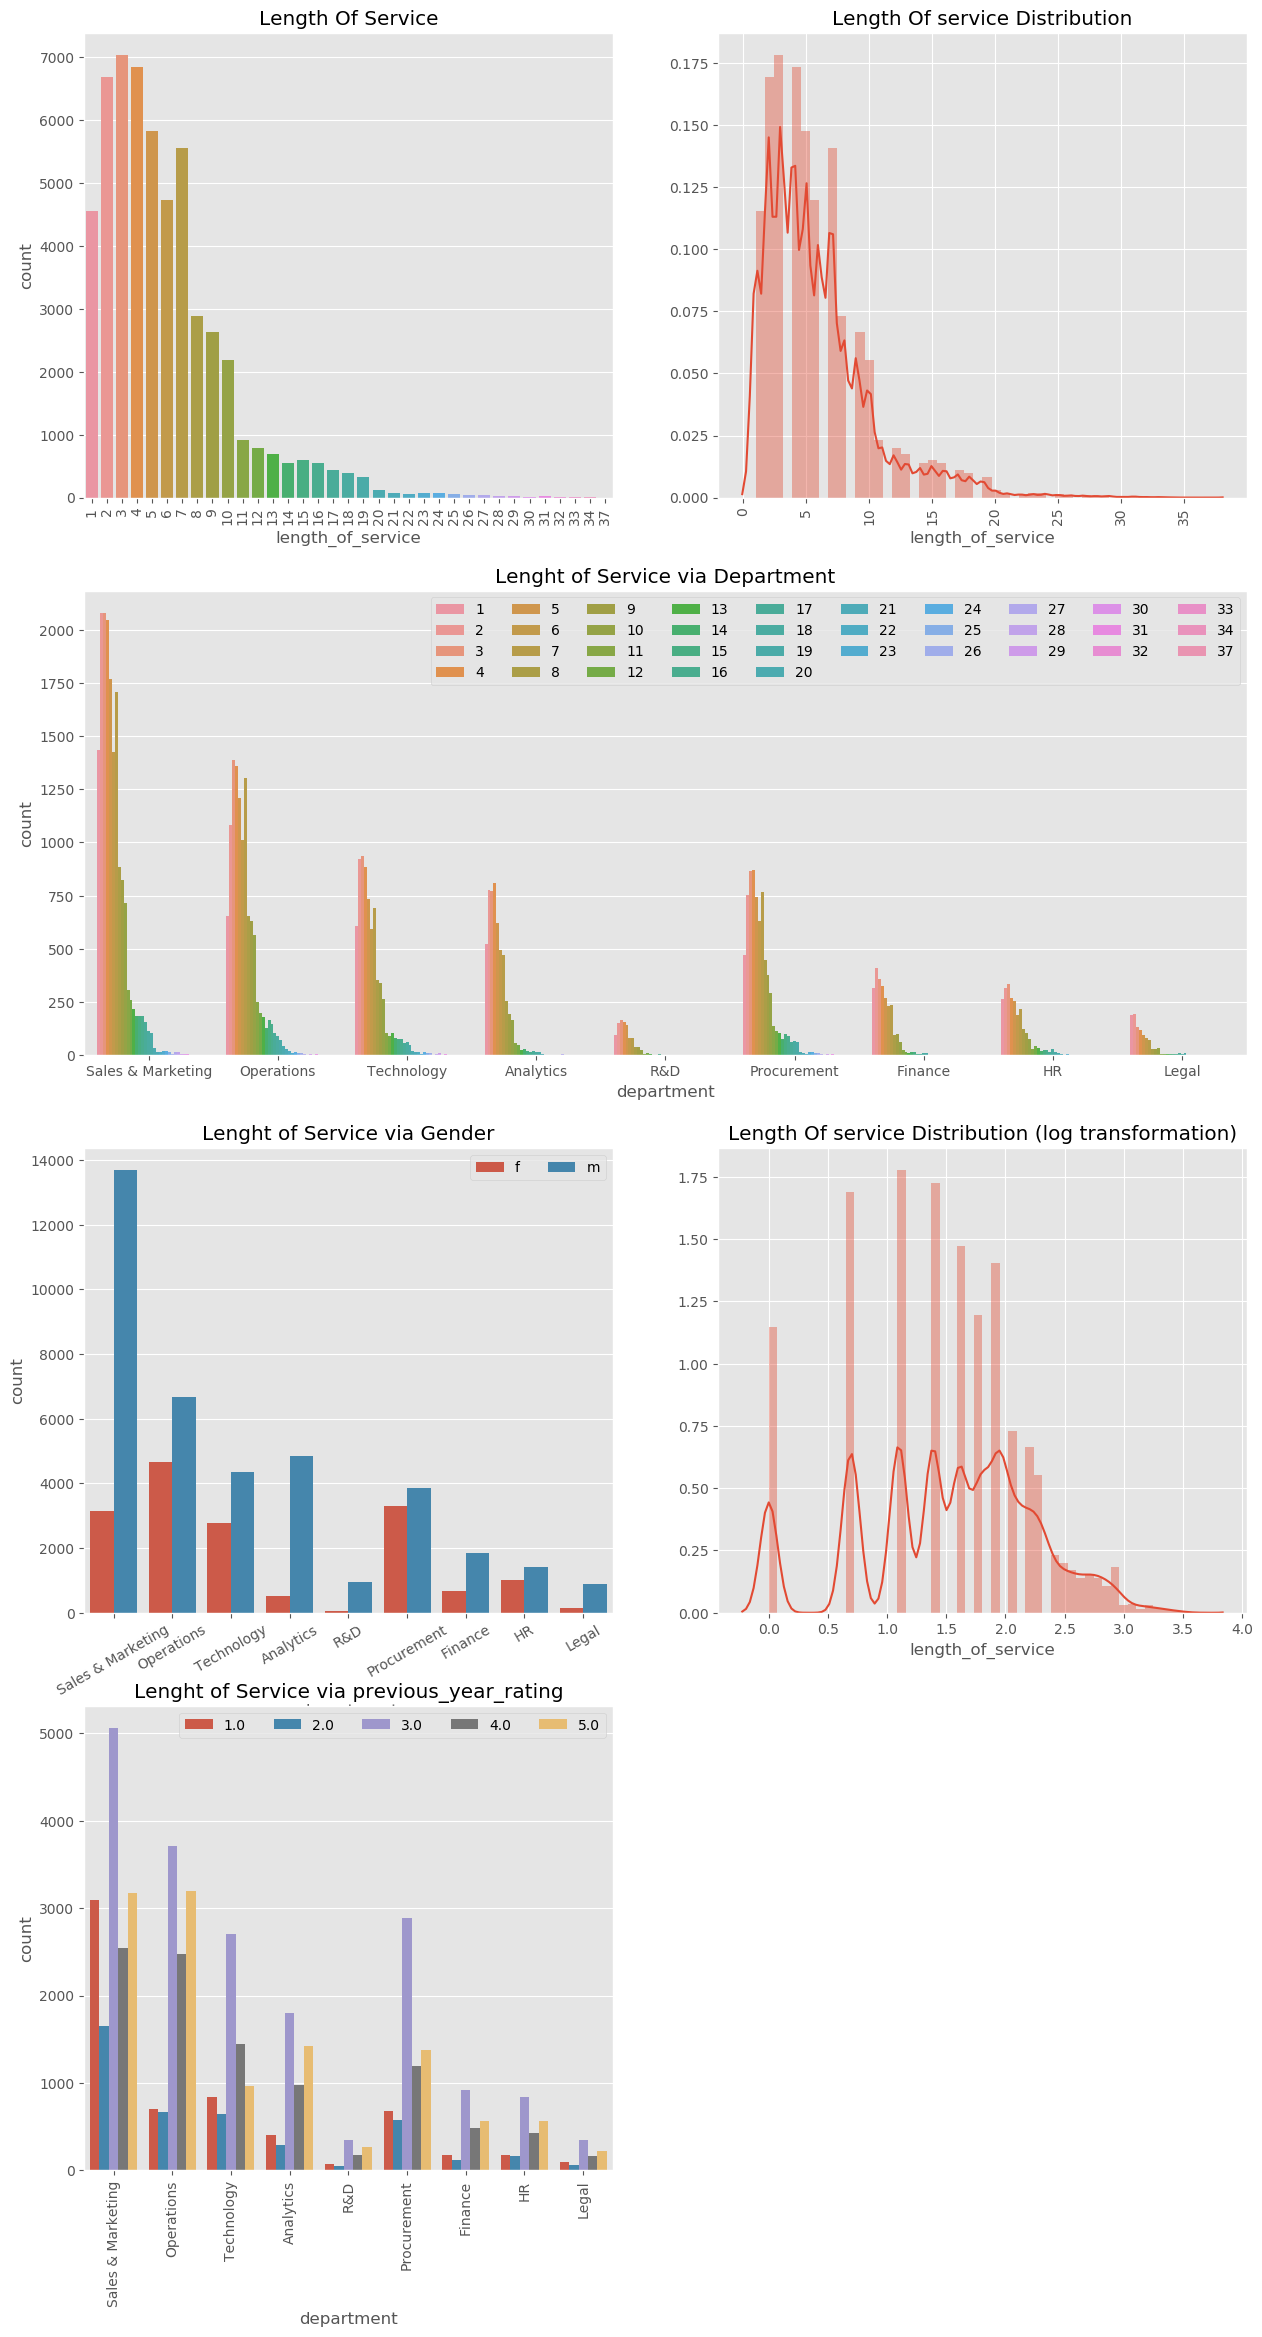

In [142]:
plt.style.use('ggplot')
plt.figure(figsize=(15,35))

plt.subplot(5,2,1)
sns.countplot(train.length_of_service)
plt.xticks(rotation=90)
plt.title('Length Of Service')

plt.subplot(5,2,2)
sns.distplot(train.length_of_service)
plt.xticks(rotation=90)
plt.title('Length Of service Distribution')

plt.subplot(5,2,(3,4))
sns.countplot(train.department,hue=train.length_of_service)
plt.legend(loc="upper right",ncol=10)
plt.title('Lenght of Service via Department')

plt.subplot(5,2,5)
sns.countplot(train.department,hue=train.gender)
plt.legend(loc="upper right",ncol=10)
plt.xticks(rotation=30)
plt.title('Lenght of Service via Gender')

plt.subplot(5,2,6)
sns.distplot(np.log(train.length_of_service))
plt.title('Length Of service Distribution (log transformation)')

plt.subplot(5,2,7)
sns.countplot(train.department,hue=train.previous_year_rating)
plt.legend(loc="upper right",ncol=10)
plt.xticks(rotation=90)
plt.title('Lenght of Service via previous_year_rating')

plt.show()

# Feature : KPI met > 80%

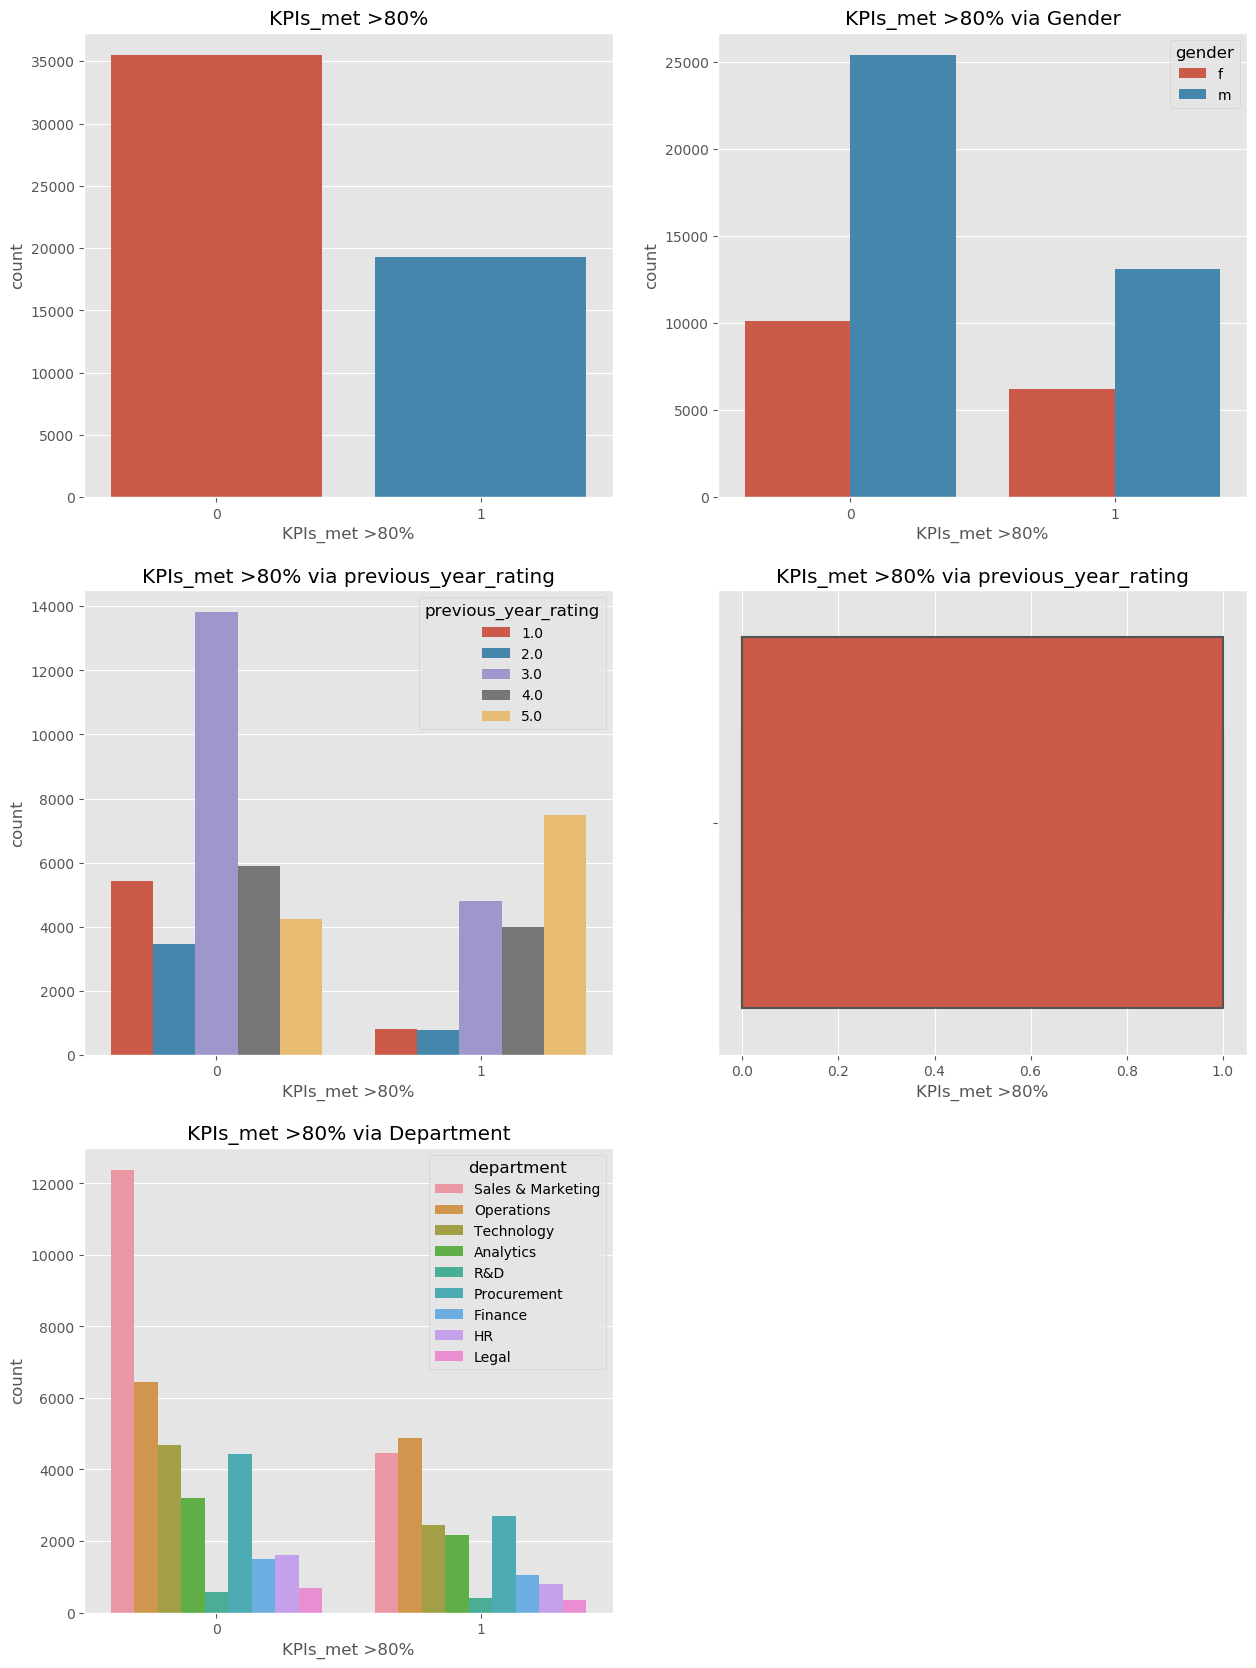

In [143]:
plt.style.use('ggplot')
plt.figure(figsize=(15,35))

plt.subplot(5,2,1)
sns.countplot(train['KPIs_met >80%'])
#plt.xticks(rotation=90)
plt.title('KPIs_met >80%')

plt.subplot(5,2,2)
sns.countplot(train['KPIs_met >80%'],hue=train.gender)
#plt.xticks(rotation=90)
plt.title('KPIs_met >80% via Gender')

plt.subplot(5,2,3)
sns.countplot(train['KPIs_met >80%'],hue=train.previous_year_rating)
#plt.xticks(rotation=90)
plt.title('KPIs_met >80% via previous_year_rating')

plt.subplot(5,2,4)
sns.boxplot(train['KPIs_met >80%'])
#plt.xticks(rotation=90)
plt.title('KPIs_met >80% via previous_year_rating')

plt.subplot(5,2,5)
sns.countplot(train['KPIs_met >80%'],hue=train.department)
#plt.xticks(rotation=90)
plt.title('KPIs_met >80% via Department')

plt.show()

# Feature : awards_won

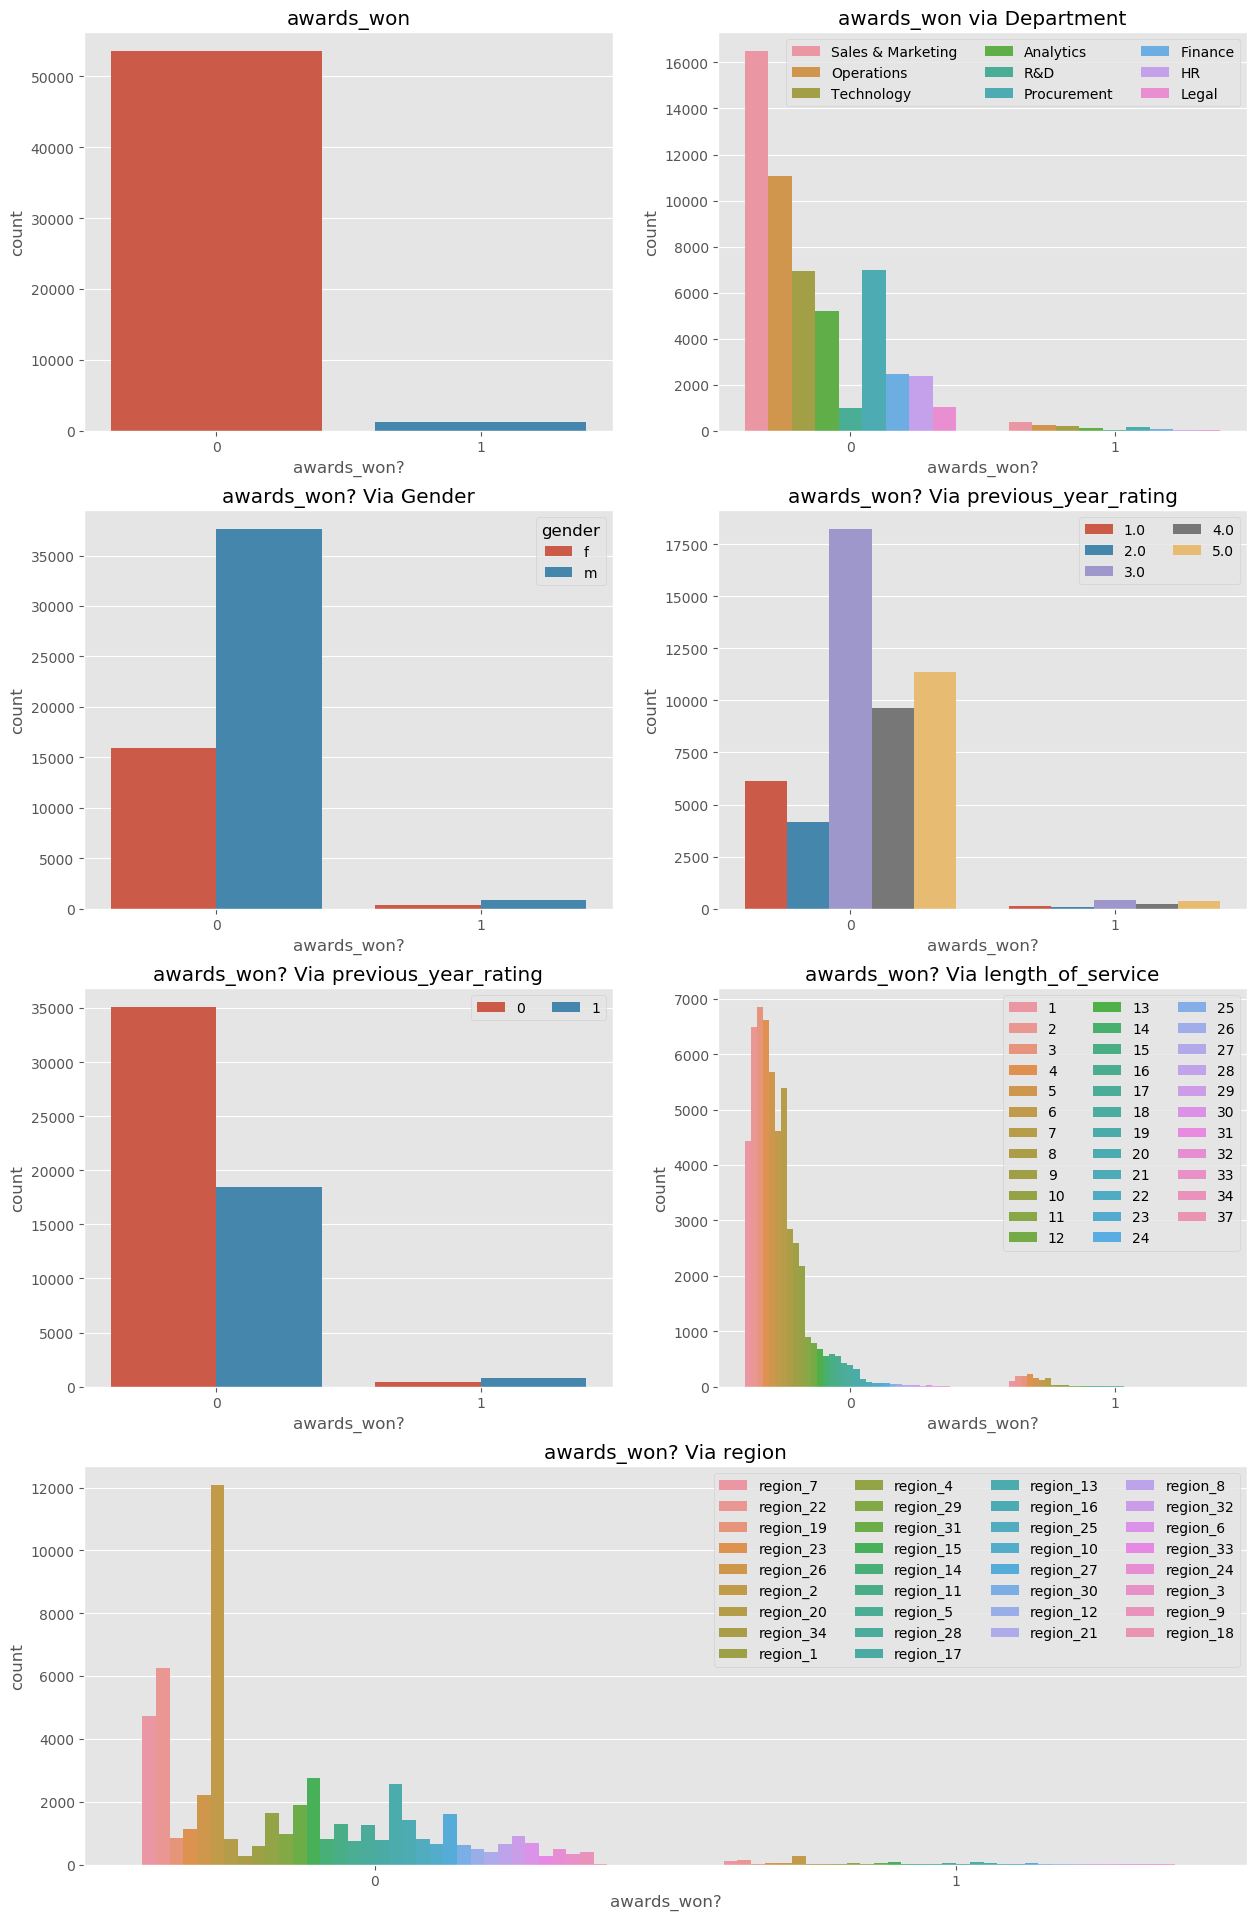

In [144]:
plt.figure(figsize=(15,30))

plt.subplot(5,2,1)
sns.countplot(train['awards_won?'])
plt.title('awards_won')

plt.subplot(5,2,2)
sns.countplot(train['awards_won?'] , hue=train.department)
plt.legend(ncol=3)
plt.title('awards_won via Department')

plt.subplot(5,2,3)
sns.countplot(train['awards_won?'],hue=train.gender)
plt.title('awards_won? Via Gender')

plt.subplot(5,2,4)
sns.countplot(train['awards_won?'],hue=train.previous_year_rating)
plt.legend(ncol=2)
plt.title('awards_won? Via previous_year_rating')

plt.subplot(5,2,5)
sns.countplot(train['awards_won?'],hue=train['KPIs_met >80%'])
plt.legend(ncol=2)
plt.title('awards_won? Via previous_year_rating')

plt.subplot(5,2,6)
sns.countplot(train['awards_won?'],hue=train.length_of_service)
plt.legend(loc='upper right', ncol=3)
plt.title('awards_won? Via length_of_service')

plt.subplot(5,2,(7,8))
sns.countplot(train['awards_won?'],hue=train.region)
plt.legend(loc='upper right', ncol=4)
plt.title('awards_won? Via region')

plt.show()

# Feature : avg_training_score

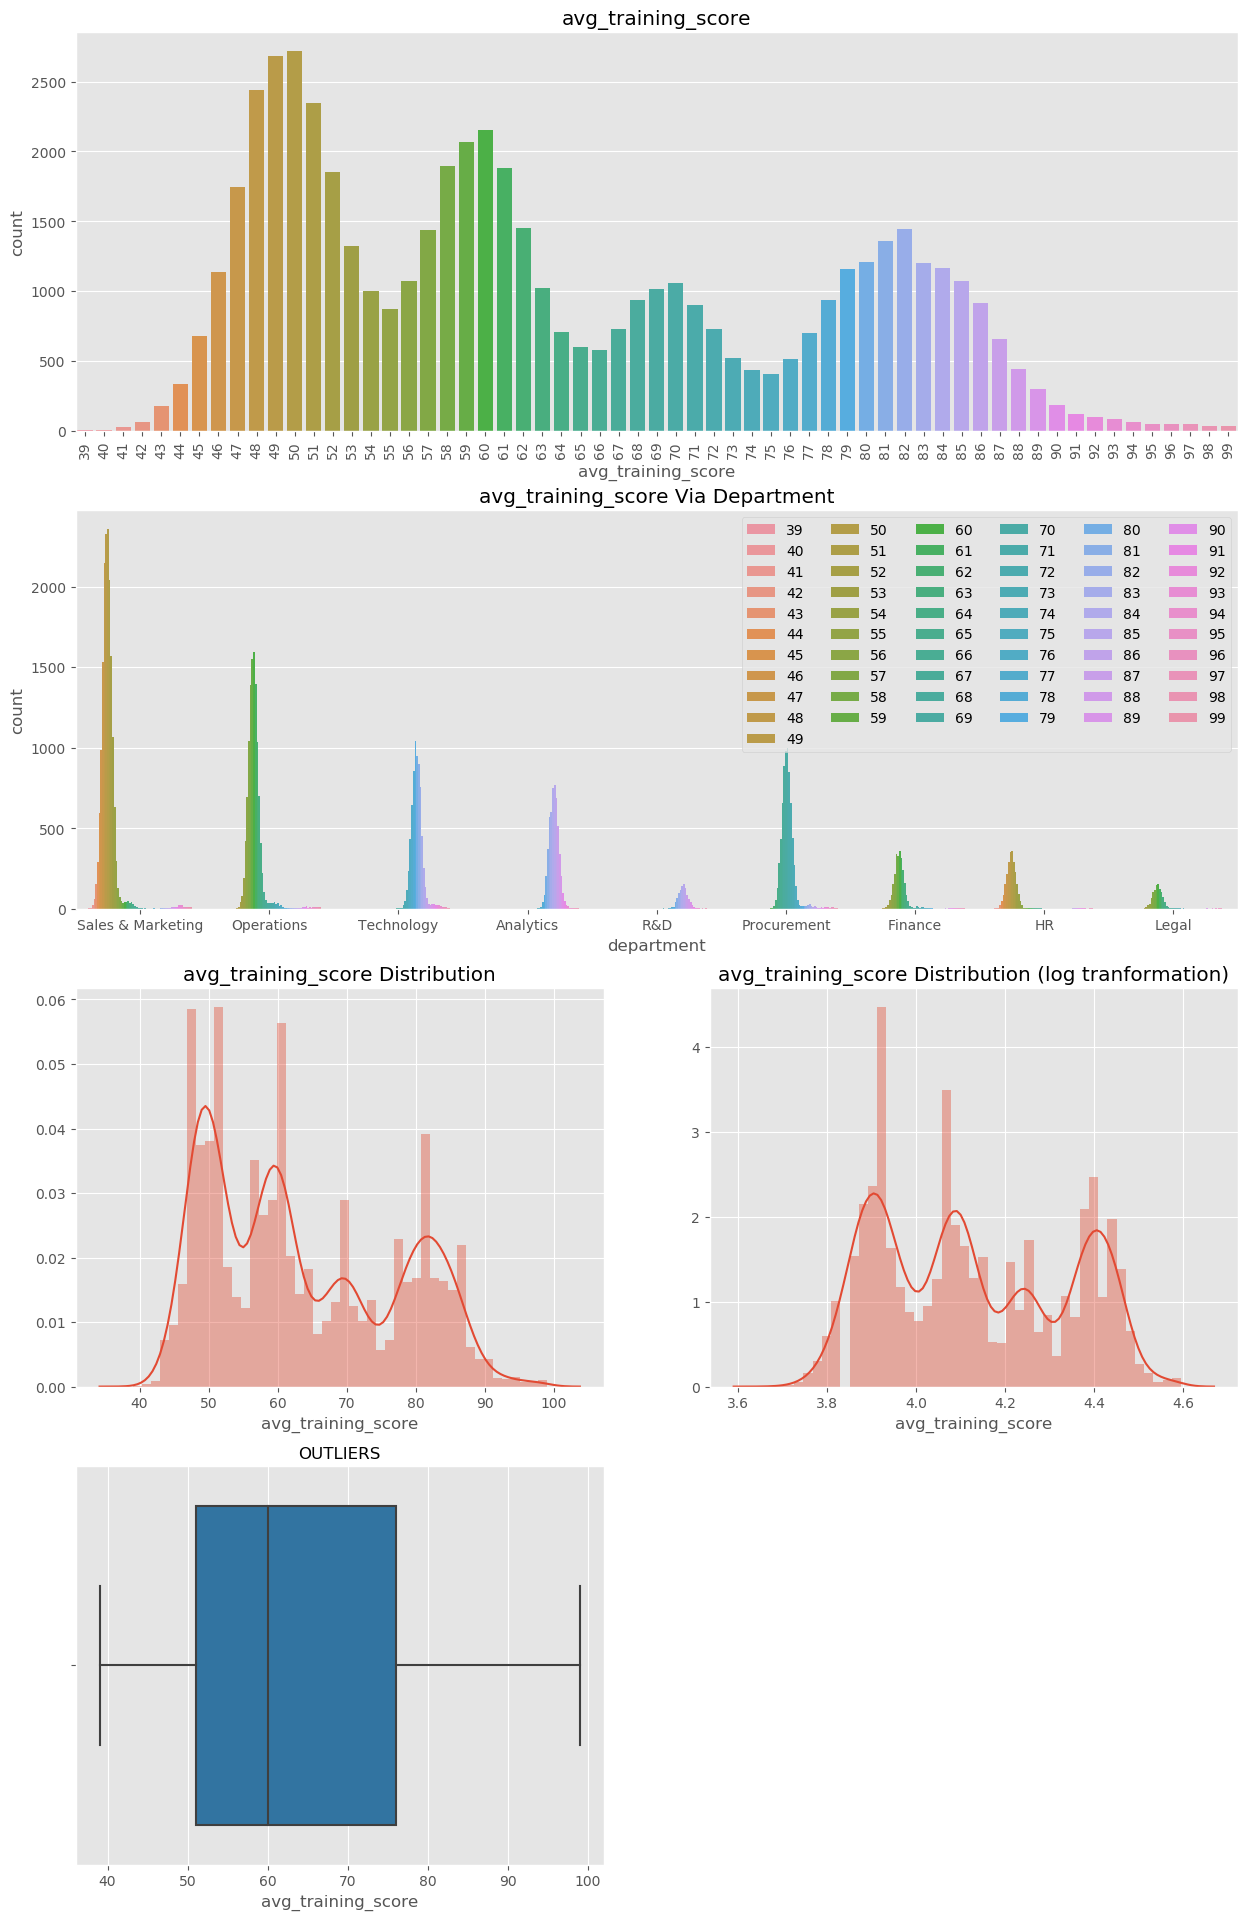

In [145]:
plt.figure(figsize=(15,30))

plt.subplot(5,2,(1,2))
sns.countplot(train.avg_training_score)
plt.xticks(rotation=90)
plt.title('avg_training_score')

plt.subplot(5,2,(3,4))
sns.countplot(train.department,hue=train.avg_training_score)
plt.legend(loc='upper right',ncol=6)
plt.title('avg_training_score Via Department')

plt.subplot(5,2,5)
plt.style.use('ggplot')
sns.distplot(train.avg_training_score)
plt.title('avg_training_score Distribution')

plt.subplot(5,2,6)
plt.style.use('ggplot')
sns.distplot( np.log(train.avg_training_score))
plt.title('avg_training_score Distribution (log tranformation)')

plt.subplot(5,2,7)
plt.style.use('default')
sns.boxplot(train.avg_training_score)
plt.title('OUTLIERS')

plt.show()

# Target Variable : is_promoted

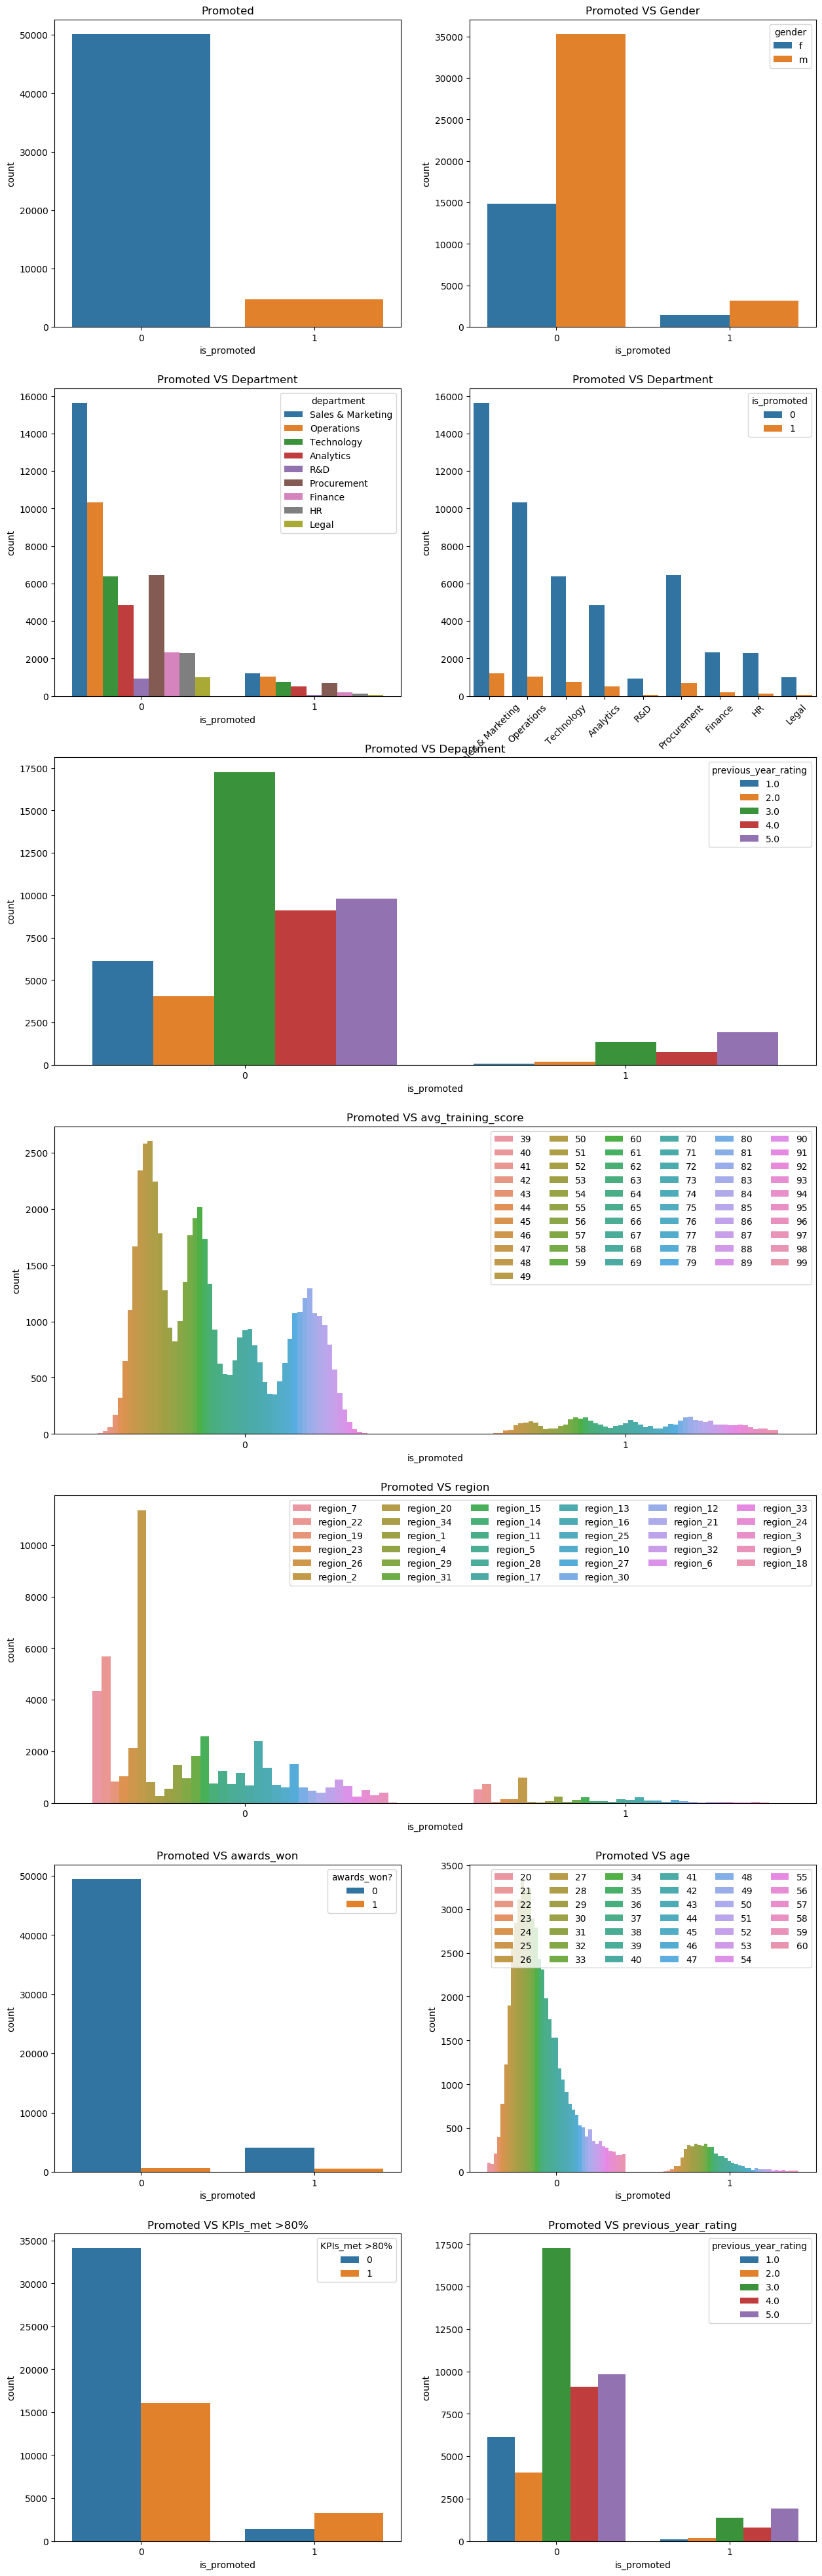

In [146]:
plt.figure(figsize=(15,50))

plt.subplot(7,2,1)
sns.countplot(train.is_promoted)
plt.title('Promoted')

plt.subplot(7,2,2)
sns.countplot(train.is_promoted,hue=train.gender)
plt.title('Promoted VS Gender')

plt.subplot(7,2,3)
sns.countplot(train.is_promoted,hue=train.department)
plt.title('Promoted VS Department')

plt.subplot(7,2,4)
sns.countplot(train.department,hue=train.is_promoted)
plt.xticks(rotation=45)
plt.title('Promoted VS Department')

plt.subplot(7,2,(5,6))
sns.countplot(train.is_promoted,hue=train.previous_year_rating)
plt.title('Promoted VS Department')

plt.subplot(7,2,(7,8))
sns.countplot(train.is_promoted,hue=train.avg_training_score)
plt.legend(ncol=6)
plt.title('Promoted VS avg_training_score')

plt.subplot(7,2,(9,10))
sns.countplot(train.is_promoted,hue=train.region)
plt.legend(ncol=6)
plt.title('Promoted VS region')

plt.subplot(7,2,11)
sns.countplot(train.is_promoted,hue=train['awards_won?'])
plt.title('Promoted VS awards_won')

plt.subplot(7,2,12)
sns.countplot(train.is_promoted,hue=train['age'])
plt.legend(ncol=6)
plt.title('Promoted VS age')

plt.subplot(7,2,13)
sns.countplot(train.is_promoted,hue=train['KPIs_met >80%'])
plt.title('Promoted VS KPIs_met >80%')

plt.subplot(7,2,14)
sns.countplot(train.is_promoted,hue=train['previous_year_rating'])
plt.title('Promoted VS previous_year_rating')

plt.show()

# Data Pre-Processing

In [161]:
train.education.value_counts()

0    39078
2    14925
1      805
Name: education, dtype: int64

In [147]:
train.education.fillna(train.education.mode()[0],inplace=True)
train.previous_year_rating.fillna(train.previous_year_rating.mode()[0],inplace=True)

In [148]:
test.education.fillna(test.education.mode()[0],inplace=True)
test.previous_year_rating.fillna(test.previous_year_rating.mode()[0],inplace=True)

In [ ]:
train.education.value_counts()

In [149]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [150]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [151]:
encoder=LabelEncoder()
for i in ['department','region','education','recruitment_channel','gender']:
    train[i]=encoder.fit_transform(train[i])
    test[i]=encoder.fit_transform(test[i])

In [152]:
x_train=train.copy()

In [153]:
x_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [154]:
test.drop(['employee_id'],axis=1,inplace=True)

In [155]:
y_train=train.is_promoted

In [156]:
x_train.drop(['employee_id','is_promoted'],axis=1,inplace=True)

In [157]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.0,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61


In [158]:
x_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49
1,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7,10,0,1,2,1,34,3.0,7,0,0,50
3,7,15,0,1,0,2,39,1.0,10,0,0,50
4,8,18,0,1,0,1,45,3.0,2,0,0,73


In [168]:
x_train.previous_year_rating=x_train.previous_year_rating.astype(int)
test.previous_year_rating=test.previous_year_rating.astype(int)

In [164]:
x_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5,8,1,0,49
1,4,14,0,1,0,1,30,5,4,0,0,60
2,7,10,0,1,2,1,34,3,7,0,0,50
3,7,15,0,1,0,2,39,1,10,0,0,50
4,8,18,0,1,0,1,45,3,2,0,0,73


In [167]:
selector = ExtraTreesClassifier()
selector.fit(x_train, y_train)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print( x_train.columns[index], round((val * 100), 2) )

department 10.33
region 12.89
education 1.03
gender 1.68
recruitment_channel 2.58
no_of_trainings 2.93
age 14.97
previous_year_rating 5.83
length_of_service 12.52
KPIs_met >80% 4.74
awards_won? 3.67
avg_training_score 26.83


In [170]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)

In [190]:
x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size=0.2, random_state=4 )

In [200]:
def fit_ml_algo(algo,x_train,y_train,cv):
    
    model=algo.fit(x_train,y_train)
    acc=round(model.score(x_test,y_test)*100,2)
    train_pred = model_selection.cross_val_predict(algo,x_test,y_test,cv=cv,n_jobs=-1)
    acc_cv=round(metrics.accuracy_score(y_test,train_pred)*100,2)
    return(train_pred, acc, acc_cv)

In [201]:
## Linear Regression

train_pred_log, acc_log, acc_cv_log =  fit_ml_algo( LogisticRegression() , x_train, y_train, 10)
print("Accuracy: "+str(acc_log))
print("Accuracy CV 10-Fold: "+str(acc_cv_log))

Accuracy: 92.02
Accuracy CV 10-Fold: 92.02


In [202]:
## KNN

train_pred_knn, acc_knn, acc_cv_knn =  fit_ml_algo( KNeighborsClassifier(), x_train, y_train, 10)
print("Accuracy: "+str(acc_knn))
print("Accuracy CV 10-Fold: "+str(acc_cv_knn))

Accuracy: 91.79
Accuracy CV 10-Fold: 91.64


In [203]:
## Gaussian Naive Bayes

train_pred_nb, acc_nb, acc_cv_nb =  fit_ml_algo( GaussianNB(), x_train, y_train, 10)
print("Accuracy: "+str(acc_nb))
print("Accuracy CV 10-Fold: "+str(acc_cv_nb))

Accuracy: 91.46
Accuracy CV 10-Fold: 91.46


In [204]:
## Support Vector Machine

train_pred_svc, acc_svc, acc_cv_svc =  fit_ml_algo( LinearSVC(), x_train, y_train, 10)
print("Accuracy: "+str(acc_svc))
print("Accuracy CV 10-Fold: "+str(acc_cv_svc))

Accuracy: 91.95
Accuracy CV 10-Fold: 91.98


In [205]:
## Stochastic Gradient Descent

train_pred_sgd, acc_sgd, acc_cv_sgd=fit_ml_algo(SGDClassifier(),x_train,y_train,10)
print('Accuracy: '+str(acc_sgd))
print('Accuracy CV 10-Fold: '+str(acc_cv_sgd))

Accuracy: 91.76
Accuracy CV 10-Fold: 91.55


In [206]:
## Decision Tree Classifier

train_pred_dt, acc_dt, acc_cv_dt=fit_ml_algo(DecisionTreeClassifier(),x_train,y_train,10)
print('Accuracy: '+str(acc_dt))
print('Accuracy CV 10-Fold: '+str(acc_cv_dt))

Accuracy: 89.76
Accuracy CV 10-Fold: 89.64


In [207]:
## Gradient Boost Trees

train_pred_gbt, acc_gbt, acc_cv_gbt=fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,10)
print('Accuracy: '+str(acc_gbt))
print('Accuracy CV 10-Fold: '+str(acc_cv_gbt))

Accuracy: 93.92
Accuracy CV 10-Fold: 93.85
